### **Импорт библиотеки и присваивание имени для удобства доступа**


In [2]:
import sympy as smp
import numpy as np
from math import *
from matplotlib import pyplot as plt
smp.init_printing(use_unicode=True)

print(smp.__version__)

1.12


### `Базовые операции с переменными`

In [3]:
x = smp.symbols('x')
y = smp.sin(x)
z = y - x**2
y = x**2 + 4*x + 3
z = y**2

z.factor()
z.expand()
z.as_poly()
smp.solve(z, x)

### `Функции от нескольких аргументов, преобразования в численный вид для построения графиков`

In [4]:
z_num = np.linspace(0,100, 101)

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/2*x**2 + (3/2)*z)


Text(0.5, 1.0, 'y solution with fixed x')

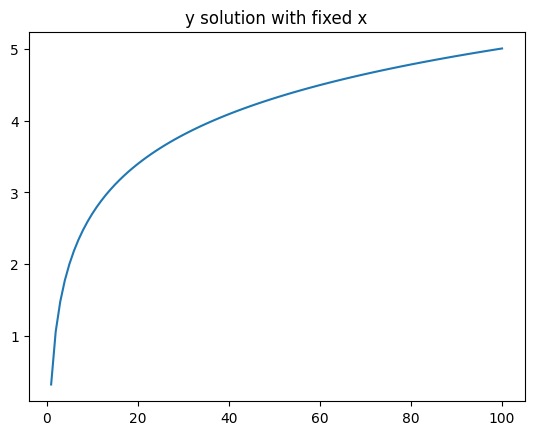

In [5]:
x, y, z = smp.symbols("x y z")
F = x**2 + 2*smp.exp(y) - 3*z
x_solutions = smp.solve(F, x)  # символьные решения относительно разных переменных
y_solutions = smp.solve(F, y)
z_solutions = smp.solve(F, z)
y_solutions
expr = y_solutions[0] # выбираем конкретное решение
expr_f = smp.lambdify([x,z], expr) # преобразуем его в функцию
expr_f.__class__  # class <function>
expr_f(0.5, radians(90))  # можно использовать как обычную функцию двух переменных
plt.plot(z_num, expr_f(0.5, z_num))  # теперь можно строить график
plt.title("y solution with fixed x")

In [6]:
F

In [7]:
a = F.subs([(x,5), (y,3), (z,3)])
a


In [8]:
a.evalf()

### `Конкретный пример`

In [9]:
smp.Rational(1,100)

In [10]:
1/100

#### Задаем имена и условия задачи

In [11]:
"""Время, начальная высота камня, начальная скорость камня, ускорение свободного падения,
начальная скорость обьекта, ускорение обьекта"""
t, h0, v0, g, vp, a = smp.symbols("t h_0 v_0 g v_p a") 
h_obj = h0 - v0*t - smp.Rational(1,2)*g*t**2 # координата камня от времени
h_obj


In [12]:
h_platform = vp*t + smp.Rational(1,2)*a*t**2 # координата платформы от времени
h_platform

In [13]:
d_h0_dt = -g*t -v0 # скорость камня от времени
d_h0_dt

In [14]:
d_hp_dt = vp + a*t # скорость платформы от времени
d_hp_dt

#### Решаем символьно

In [15]:
eq1, eq2 = h_obj - h_platform, d_h0_dt + d_hp_dt # условия задачи
solutions = smp.solve([eq1, eq2], [t,v0])  # выбираем переменные, относительно которых ищем решение
t_sol, v_sol = solutions[0]

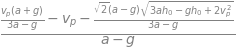

In [16]:
t_sol

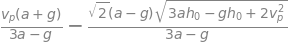

In [17]:
v_sol

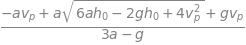

In [18]:
d_h0_dt.subs([(t, t_sol), (v0, v_sol)]).simplify()

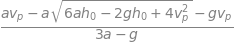

In [19]:
d_hp_dt.subs([(t, t_sol), (v0, v_sol)]).simplify()

### `Различные вычисления`

#### Пределы

In [20]:
x = smp.symbols('x')
eq = x/x**2
smp.limit(eq, x, -smp.oo)  # x -> -infinity

In [21]:
eq = smp.sin(x) / x
eq


In [22]:
smp.limit(eq, x, 0)


#### Производные

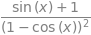

In [25]:
eq = (1 + smp.sin(x))/(1 - smp.cos(x))**2
eq

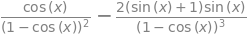

In [26]:
smp.diff(eq, x)

In [40]:
f, g = smp.symbols("f g", cls=smp.Function)
g = g(x)
f = f(g)
dfdx = smp.diff(f, x)
dfdx

In [51]:
dfdx.subs([(g, smp.sin(x)), (f, smp.cos(x))])

#### Интегралы

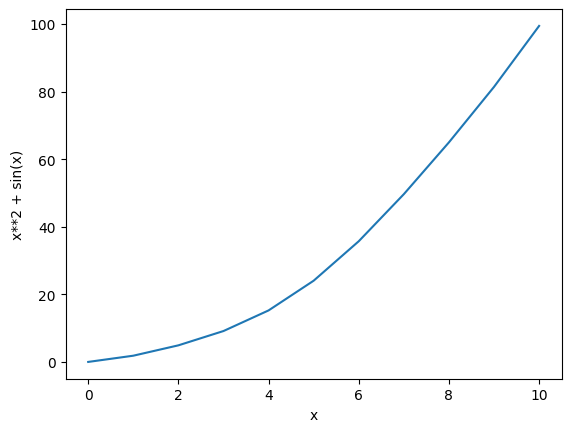

In [69]:
integral = smp.integrate(smp.cos((x)) + 2*x, x).doit() # находим интеграл символьно
foo = smp.lambdify([x], integral) # преобразуем его в функцию
space = np.linspace(0, 10, 11)
plt.plot(space, foo(space)) # строим график этой функции
plt.xlabel("x")
plt.ylabel(integral)
plt.show()


In [73]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(10))) # используем пределы интегрирования

In [77]:
t = smp.symbols("t")
smp.integrate(x**3*10*smp.exp(x), (x,1,t))  # предел интегрирования может быть символьным

In [86]:
smp.integrate(smp.exp(x), (x, -smp.oo, 0)) # даже может взять интеграл с бесконечным пределом (если он сходится конечно)

### `Линал и векторы`

In [90]:
x, y, z, u, u1, u2, v, v1, v2 = smp.symbols("x y z u u_1 u_2 v v_1 v_2")


#### Базовые операции с векторами

In [98]:
U = smp.Matrix([u, u1, u2]) # одномерный вектор
V = smp.Matrix([v, v1, v2])
2*U + V

⎡ 2⋅u + v ⎤
⎢         ⎥
⎢2⋅u₁ + v₁⎥
⎢         ⎥
⎣2⋅u₂ + v₂⎦

In [99]:
U.dot(V) # скалярное произведение векторов

In [100]:
V.cross(U) # векторное произведение векторов

⎡-u₁⋅v₂ + u₂⋅v₁⎤
⎢              ⎥
⎢ u⋅v₂ - u₂⋅v  ⎥
⎢              ⎥
⎣ -u⋅v₁ + u₁⋅v ⎦

In [101]:
U.cross(V)

⎡u₁⋅v₂ - u₂⋅v₁⎤
⎢             ⎥
⎢-u⋅v₂ + u₂⋅v ⎥
⎢             ⎥
⎣ u⋅v₁ - u₁⋅v ⎦

#### Векторные производные 

In [107]:
r = smp.Matrix([3*t, smp.sin(t), t**2]) # задаем вектор-функцию
r

⎡ 3⋅t  ⎤
⎢      ⎥
⎢sin(t)⎥
⎢      ⎥
⎢   2  ⎥
⎣  t   ⎦

In [105]:
v = smp.diff(r, t) # вектор, определяющий скорость точки
a = smp.diff(v, t) # вектор, определяющий ускорение точки
a

⎡   0   ⎤
⎢       ⎥
⎢-sin(t)⎥
⎢       ⎥
⎣   2   ⎦

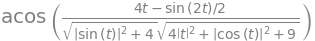

In [114]:
theta_angle = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify() # находим угол между векторами через скалярное произведение
theta_angle 


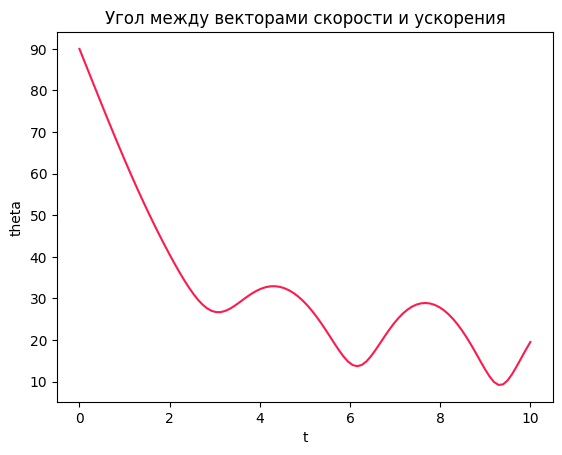

In [158]:
foo = smp.lambdify([t], theta_angle)  # преобразуем в функцию
space = np.linspace(0, 10, 100) # линспейс для аргументов
plt.plot(space, foo(space)*180/smp.pi, color=(1,0.1, 0.3))
plt.xlabel(t)
plt.ylabel("theta")
plt.title("Угол между векторами скорости и ускорения")
plt.show()

#### Матрицы

In [221]:
A = smp.Matrix([[x,2,y], [4,z,u]])
smp.shape(A) 
A.shape # same thing\
A

⎡x  2  y⎤
⎢       ⎥
⎣4  z  u⎦

In [222]:
A.row(1)

[4  z  u]

In [223]:
A.col(2)


⎡y⎤
⎢ ⎥
⎣u⎦

In [225]:
A.col_del(0)


In [224]:
A.col_insert(0,smp.Matrix([1,4]))

⎡1  x  2  y⎤
⎢          ⎥
⎣4  4  z  u⎦

In [226]:
A**-1 # обратная матрица

⎡   -u           y     ⎤
⎢──────────  ──────────⎥
⎢-2⋅u + y⋅z  -2⋅u + y⋅z⎥
⎢                      ⎥
⎢   -z           2     ⎥
⎢─────────   ───────── ⎥
⎣2⋅u - y⋅z   2⋅u - y⋅z ⎦

In [227]:
A.T # транспонирование

⎡2  z⎤
⎢    ⎥
⎣y  u⎦

In [228]:
B = smp.eye(3) # единичная матрица
B

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [229]:
B.eigenvals()

In [230]:
B.eigenvects()

⎡⎛      ⎡⎡1⎤  ⎡0⎤  ⎡0⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟⎥
⎢⎜1, 3, ⎢⎢0⎥, ⎢1⎥, ⎢0⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦  ⎣0⎦  ⎣1⎦⎦⎠⎦